<h2>Covid-19 seurantaa</h2>

Ajamalla koodit saat tuoreimman tilanteen.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
%matplotlib inline

# Mahdollisten varoitusten piilotus
warnings.filterwarnings('ignore')

# Grafiikan tyyliasetus
plt.style.use('ggplot')

# Ajantasaisen datan nouto ecdc:n sivuilta
df = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv")

# Päivämäärät indeksiin
df.index = pd.to_datetime(df['dateRep'], format = '%d/%m/%Y')
df = df.drop('dateRep', axis = 1).sort_index()

df.head()

,year_week,cases_weekly,deaths_weekly,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,notification_rate_per_100000_population_14-days
dateRep,,,,,,,,,
2020-01-06,2020-01,0,0,Nigeria,NG,NGA,200963603.0,Africa,NaN
2020-01-06,2020-01,0,0,Dominican_Republic,DO,DOM,10738957.0,America,NaN
2020-01-06,2020-01,0,0,Ecuador,EC,ECU,17373657.0,America,NaN
2020-01-06,2020-01,0,0,Egypt,EG,EGY,100388076.0,Africa,NaN
2020-01-06,2020-01,0,0,Estonia,EE,EST,1324820.0,Europe,NaN


In [2]:
# Funktio noutaa datasta maan tiedot (tartunnat, kuolleet, asukasluku) 
# ja esittää tiedot viivakaaviona
def tapaukset(maa):
    
    df_maa = df[df['countriesAndTerritories'] == maa][['cases_weekly', 'deaths_weekly', 'popData2019']]
        
    fig, ax1 = plt.subplots(figsize = (14, 6))
    ax1.set_ylabel('Tartunnat viikossa', color = 'C0')
    ax1.plot(df_maa['cases_weekly'], color = 'C0')
    ax2 = ax1.twinx()
    ax2.set_ylabel('Kuolemat viikossa', color = 'C1')
    ax2.plot(df_maa['deaths_weekly'], color = 'C1')
    asukasluku = df_maa['popData2019'][0].astype(int).astype(str)
    ax1.set_title(maa + ' (asukasluku 2019: ' + asukasluku + ')')
    
    print(datetime.now())
    

# Funktio piirtää neljän maan tartuntojen ilmaantumisen viimeisen 14 päivän ajalta sataatuhatta asukasta kohden viivakaavioon
def vertaa4(maa1, maa2, maa3, maa4):
    
    df_maa1 = df[df['countriesAndTerritories'] == maa1]
    df_maa2 = df[df['countriesAndTerritories'] == maa2]
    df_maa3 = df[df['countriesAndTerritories'] == maa3]
    df_maa4 = df[df['countriesAndTerritories'] == maa4]
    
    fig, ax = plt.subplots(figsize = (14, 6))
    ax.plot(df_maa1['notification_rate_per_100000_population_14-days'], color = 'C0', label = maa1)
    ax.plot(df_maa2['notification_rate_per_100000_population_14-days'], color = 'C1', label = maa2) 
    ax.plot(df_maa3['notification_rate_per_100000_population_14-days'], color = 'C2', label = maa3)
    ax.plot(df_maa4['notification_rate_per_100000_population_14-days'], color = 'C3', label = maa4) 
    ax.set_ylabel('Ilmaantuvuus 14 pv / 100000')
    ax.set_title(maa1 + ' , ' +  maa2 + ' , ' + maa3 + ' & ' + maa4)
    ax.legend()
    
    print(datetime.now())
    

# Funktio piirtää neljän maan kuolemat viimeisen 14 päivän ajanlta sataa tuhatta asukasta kohden viivakaavioon
def vertaa4k(maa1, maa2, maa3, maa4):
    
    df_maa1 = df[df['countriesAndTerritories'] == maa1]
    df_maa2 = df[df['countriesAndTerritories'] == maa2]
    df_maa3 = df[df['countriesAndTerritories'] == maa3]
    df_maa4 = df[df['countriesAndTerritories'] == maa4]
    
    df_maa1['deaths2'] = df_maa1['deaths_weekly'] / (df_maa1['popData2019'] / 100000)
    df_maa2['deaths2'] = df_maa2['deaths_weekly'] / (df_maa2['popData2019'] / 100000)
    df_maa3['deaths2'] = df_maa3['deaths_weekly'] / (df_maa3['popData2019'] / 100000)
    df_maa4['deaths2'] = df_maa4['deaths_weekly'] / (df_maa4['popData2019'] / 100000)
    
    fig, ax = plt.subplots(figsize = (14, 6))
    ax.plot(df_maa1['deaths2'].rolling(2).sum(), color = 'C0', label = maa1)
    ax.plot(df_maa2['deaths2'].rolling(2).sum(), color = 'C1', label = maa2) 
    ax.plot(df_maa3['deaths2'].rolling(2).sum(), color = 'C2', label = maa3)
    ax.plot(df_maa4['deaths2'].rolling(2).sum(), color = 'C3', label = maa4) 
    ax.set_ylabel('Kuolemat 14 pv / 100000')
    ax.set_title(maa1 + ' , ' +  maa2 + ' , ' + maa3 + ' & ' + maa4)
    ax.legend()
    
    print(datetime.now())


2021-01-11 13:22:56.473401


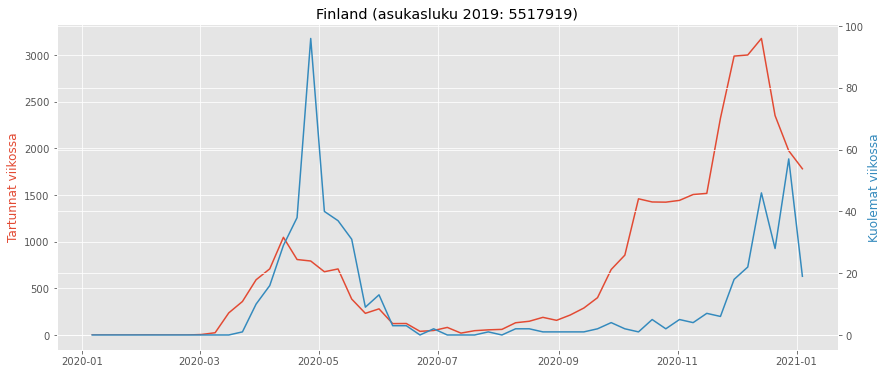

In [3]:
tapaukset('Finland')

2021-01-11 13:22:56.694230


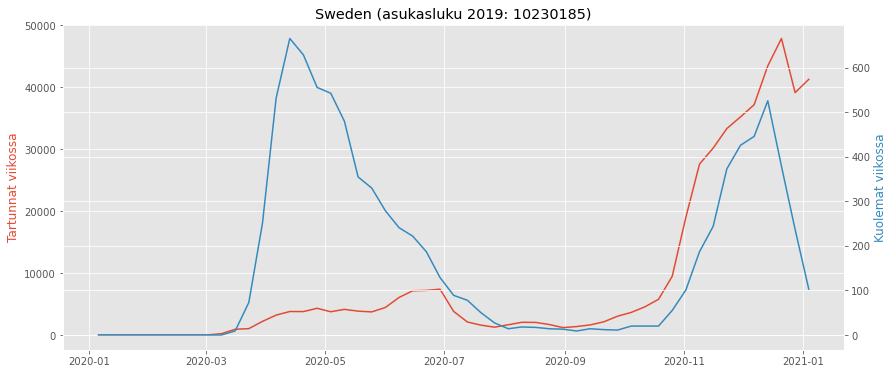

In [4]:
tapaukset('Sweden')

2021-01-11 13:22:56.877875


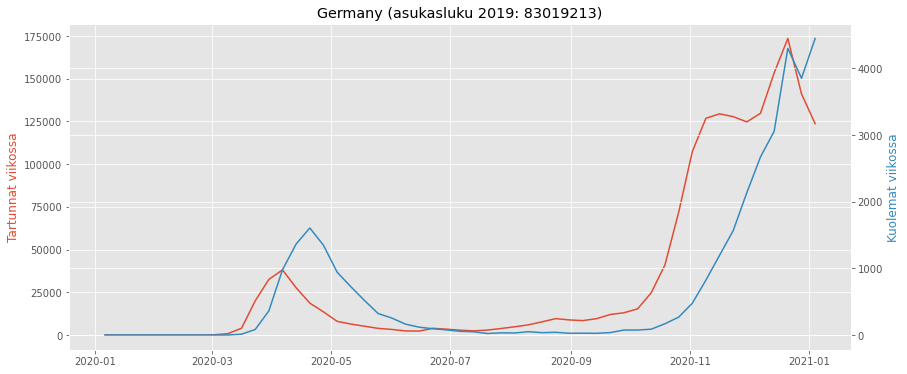

In [5]:
tapaukset('Germany')

2021-01-11 13:22:57.061798


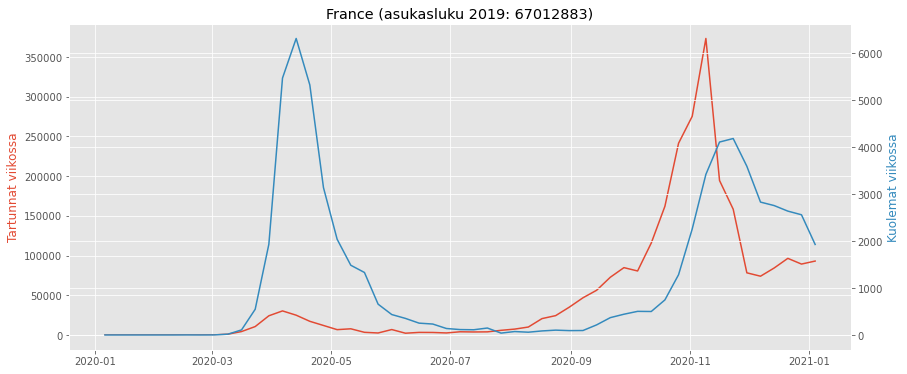

In [6]:
tapaukset('France')

2021-01-11 13:22:57.284298


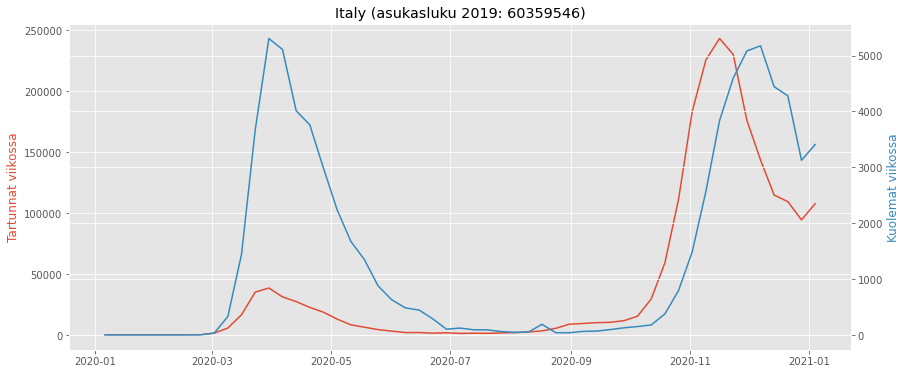

In [7]:
tapaukset('Italy')

2021-01-11 13:22:57.463500


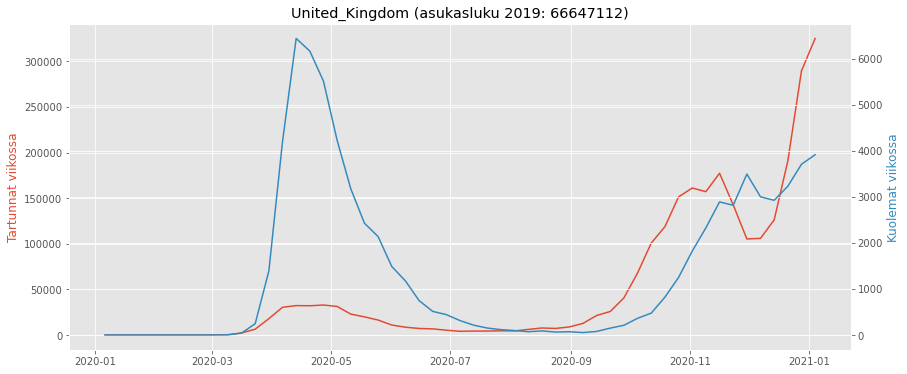

In [8]:
tapaukset('United_Kingdom')

2021-01-11 13:22:57.636021


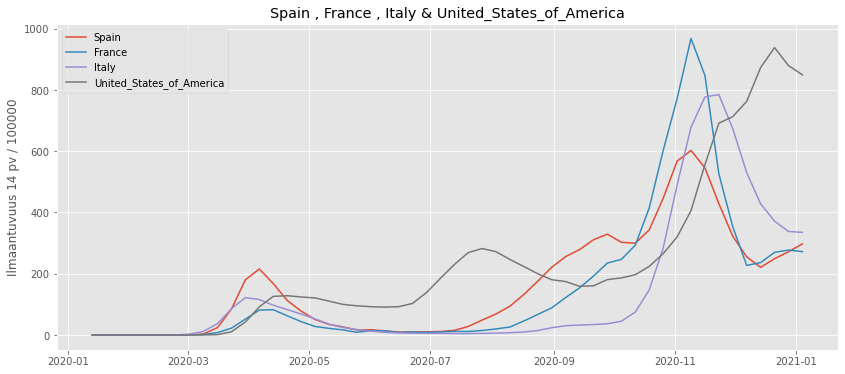

In [9]:
vertaa4('Spain', 'France', 'Italy', 'United_States_of_America')

2021-01-11 13:22:57.789820


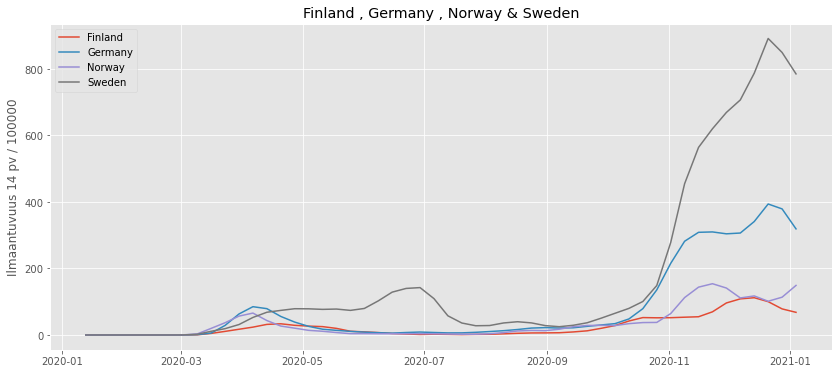

In [10]:
vertaa4('Finland', 'Germany', 'Norway', 'Sweden')

2021-01-11 13:22:57.946172


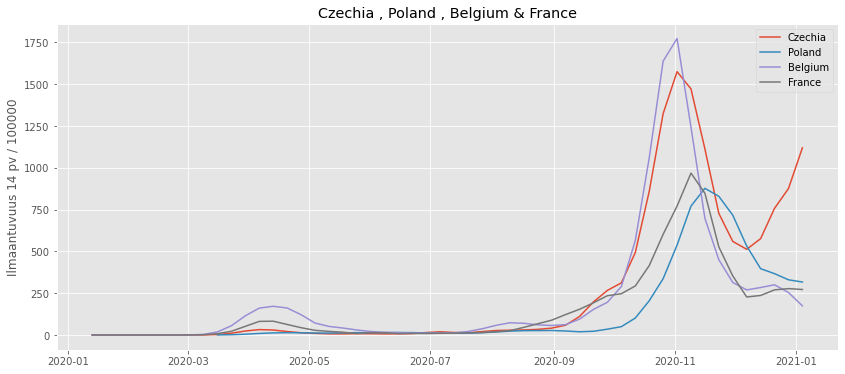

In [11]:
vertaa4('Czechia', 'Poland', 'Belgium', 'France')

2021-01-11 13:22:58.100355


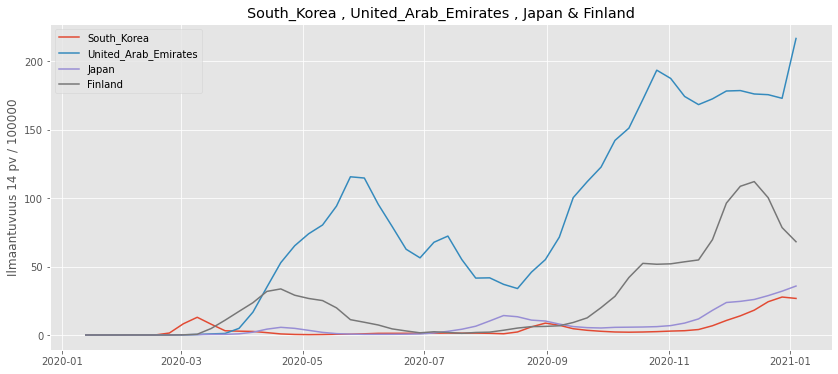

In [12]:
vertaa4('South_Korea', 'United_Arab_Emirates', 'Japan', 'Finland')

2021-01-11 13:22:58.281043


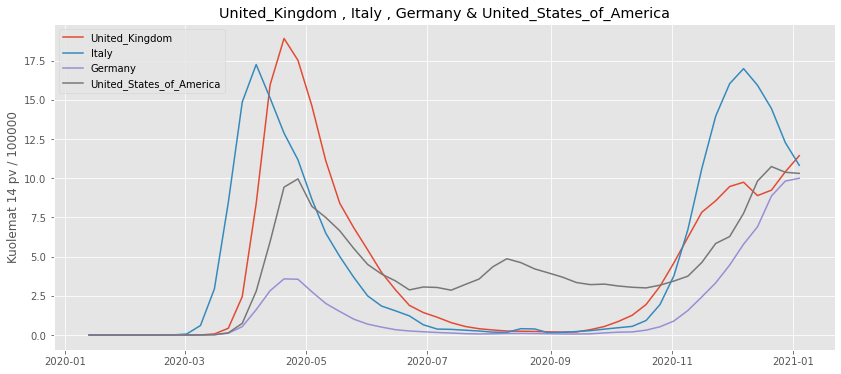

In [13]:
vertaa4k('United_Kingdom', 'Italy', 'Germany', 'United_States_of_America')

In [14]:
# Jos haluat katsoa muiden maiden tietoja, niin kirjoita maiden nimet oikein:
np.sort(df['countriesAndTerritories'].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eri